# COHORT ANALYSIS

I have learned about cohort analysis as tool to understand retention rate as well as get more insights from busniess performance. I got clearer view about cohort analysis through the video [500Distro] Retention and Cohort Analysis with Bei Lu https://www.youtube.com/watch?v=VvYV0V-kxr

This code is what I tried to practice how to conduct a cohort analysis and extract the insightful information.
Dataset: https://www.kaggle.com/datasets/tunguz/online-retail

Based on the dataset, I will run 3 different cohort analysis: Retention, Average Quantity, and Average Sales

Step 1: Data Preparation

    import libraries (pandas, numpy, datatime, seaborn, matplotlib.pyplot)
    review dataset
    transform data (group by customerid to extract their first purchase date that will be cohorts, cohort index)
    
Step 2: Data Analysis

    Create cohort as dataframe(groupby, pivot_table)
    Visualize the dataframe to extract insights
    


## Data Prepration

In [ ]:
#import libs:

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data

df = pd.read_excel(r'\Users\Admin\Cohort_analysis_Python\Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Check data shape
df.shape

(541909, 8)

In [4]:
#Check null value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are some invoices without Customer ID. We will remove these rows

In [5]:
df = df.dropna(subset = 'CustomerID')
df.shape

(406829, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
#Wrirte a function get_month 
def get_month(x):
    return dt.datetime(x.dt.year, x.dt.month, int(1))

df['Invoice_month'] = df[['InvoiceDate']].apply(get_month, axis =1)
df['Cohortmonth'] = df.groupby('CustomerID')['Invoice_month'].transform('min')


C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\2749467973.py:3: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return dt.datetime(x.dt.year, x.dt.month, int(1))


In [8]:
# Write a function get_date:

def get_date( df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_date(df, 'Invoice_month')
cohort_year, cohort_month, _ = get_date(df, 'Cohortmonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df['CohortIndex'] = year_diff*12 + month_diff +1
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohortmonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


## Data Analysis

### Create User Number and Retention Cohort

In [9]:
#Create Dataframe to show the active users of each cohort
cohort_data = df.groupby(["Cohortmonth", "CohortIndex"])["CustomerID"].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot(index = 'Cohortmonth', columns ='CohortIndex', values = 'CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Based on the cohort_count DataFrame, I will calculate the retention of each cohort

cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis =0)
retention.round(3)*100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


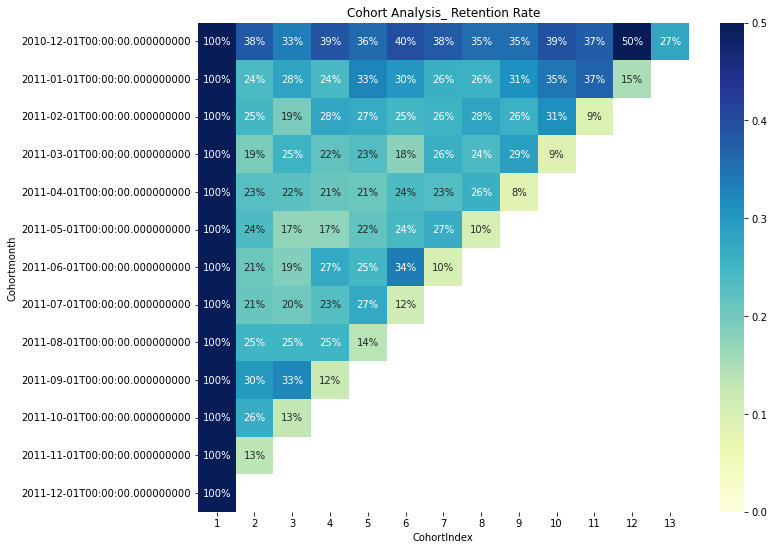

In [16]:
#Use seaborn to visualize the dataframe

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis_ Retention Rate')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = '0.0', vmax = '0.5', cmap = 'YlGnBu')
plt.show()

From the graph, we can see the retention of cohort 2010-12 tends to be higher than others. There is 50% of users in cohort 2010-12 returns in November 2011. We can take another deeper analysis this cohort about marketing campaigns and users to know exactly why this cohort has the highest retention and why they returns to us in 11-2011.

Besides, We also need to consider cohort 11-2011 beacause of the low of retention. In November 2011, We easily see that the retention rate of whole cohorts are significantly declined. It's signal for us to find the rootcauses and take action.

### Cohort Analysis_ Average Quantity Sold

In [19]:
#Prepare data
quantity_data = df.groupby(['Cohortmonth', 'CohortIndex'])['Quantity'].mean().reset_index()
quantity_cohort = quantity_data.pivot_table(index = 'Cohortmonth', columns ='CohortIndex', values ='Quantity')
quantity_cohort.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


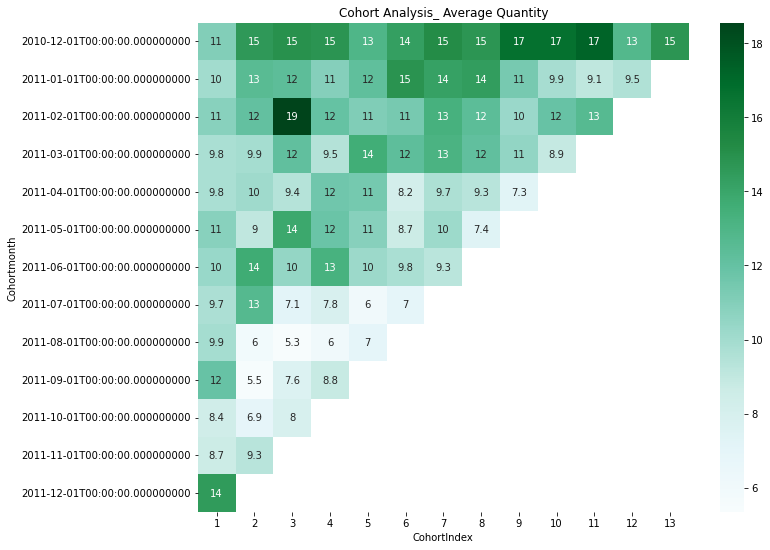

In [23]:
#Visualize the quantity_cohort
plt.figure(figsize =(11,9))
plt.title('Cohort Analysis_ Average Quantity')
sns.heatmap(data = quantity_cohort, annot = True, cmap = 'BuGn')
plt.show()

We can quickly realize that the average quantity of recent month 11-2011 was facing a decline. It's warning signal that users stop buying. The reason needs futher investigation.

### Cohort Analysis _ Average Sales

In [24]:
df['TotalSale'] = df['Quantity']* df['UnitPrice']

sales_data = df.groupby(['Cohortmonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
sales_cohort = sales_data.pivot(index = 'Cohortmonth', columns = 'CohortIndex', values = 'TotalSale').round(1)
sales_cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,20.7,25.0,25.1,25.0,19.9,25.5,26.5,25.4,26.0,31.1,30.6,22.2,24.7
2011-01-01,18.4,23.5,20.3,17.5,21.5,25.4,24.4,24.5,18.7,20.1,18.7,18.4,NaN
2011-02-01,17.0,17.0,19.3,18.8,16.1,15.1,21.6,20.9,17.5,20.6,21.5,NaN,NaN
2011-03-01,17.0,17.9,21.5,17.0,19.2,18.1,21.7,17.3,15.4,11.4,NaN,NaN,NaN
2011-04-01,16.4,20.2,18.8,18.4,18.6,14.2,14.6,15.3,11.8,NaN,NaN,NaN,NaN
2011-05-01,19.0,15.7,21.2,19.4,17.8,14.1,16.1,13.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.4,14.5,19.0,19.8,15.0,15.9,12.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.1,21.2,11.4,12.4,10.5,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.1,11.9,11.5,14.4,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


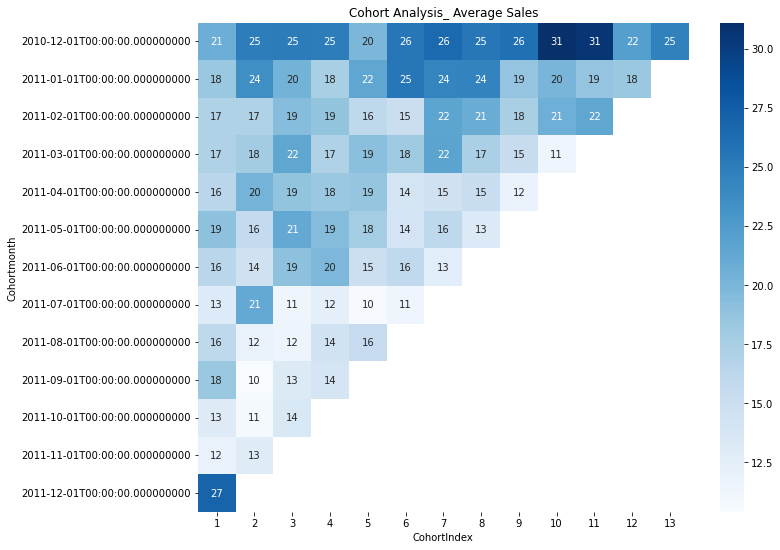

In [26]:
#Visualize Sales_cohort

plt.figure(figsize =(11,9))
plt.title("Cohort Analysis_ Average Sales")
sns.heatmap(data = sales_cohort, annot = True, cmap = 'Blues')
plt.show()

The results is parallel to Average quantity, which the retailer faces a significant decline in recent months. How to sustain the buying behaviors will be the issue with thinking for the product/marketing team.